# Implementing Linear Regression using Numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading Data using np.loadText
my_data = np.loadtxt('data/ex1data1.txt',delimiter=',') 

In [3]:
print(type(my_data))
print(my_data.shape)

<class 'numpy.ndarray'>
(97, 2)


In [4]:
##Adding interceptor term X0
my_final_data = np.concatenate((np.ones((my_data.shape[0],1)),my_data),axis=1)

In [5]:
print(type(my_final_data))
print(my_final_data.shape)

<class 'numpy.ndarray'>
(97, 3)


In [6]:
###Extracting Features from my data
X = my_final_data[:,:-1]
y = my_final_data[:,-1].reshape(my_final_data.shape[0],1)

In [7]:
y.shape,X.shape

((97, 1), (97, 2))

In [8]:
#my_final_data

In [9]:
##Plotting the scatter plot of X1 feature
def plotScatter(X,d,y):
    plt.scatter(X[:,d],y,color="r",marker="*")
    plt.xlabel("Population")
    plt.ylabel("Profit in USD")
    plt.title("Plotting the USA GDP")

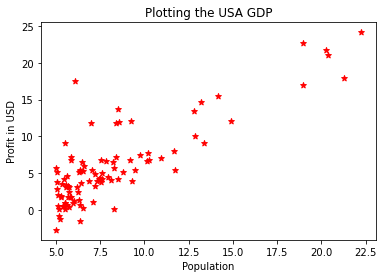

In [10]:
plotScatter(X,1,y)

In [11]:
###Initializing the Parameters Theta to Number of Features
Theta = np.zeros(shape=(X.shape[1],1))
print(Theta)
print(Theta.shape)

[[0.]
 [0.]]
(2, 1)


In [12]:
#####Compute the Cost "J" for Gradient Descent #####
##Inputs to the function are Theta,X,y
###X is in (n,d) shape,y is in (n,1) shape , Theta is in (d,1) shape
### n - number of examples,d- number of features(dimensions)
def computeCost(Theta,X,y):
    #print(X.shape)
    #print(y.shape)
    m = X.shape[0]
    J = 1/(2*m) * np.sum( np.square(np.dot(X,Theta) - y))
    return J
    

In [13]:
#print(X.T.shape)
cost = computeCost(Theta,X,y)
print(cost)
###Computing furthur cost.
cost = computeCost(np.array([[-1],[2]]),X,y)
print("cost:",cost)

32.072733877455676
cost: 54.24245508201238


In [14]:
###Normalization of Inputs
###Xnorm = X-mean/std
### Normalization should be excluded for Interceptor X0
### Standard Normalization helps to converge fast in Gradient Descent
def Standard_Normalization(X):
    mean = np.mean(X,axis=0,keepdims=True)
    mean[0,0] = 0
    std = np.std(X,axis=0,keepdims=True)
    std[0,0] = 1
    X_norm = (X-mean)/std
    return mean,std,X_norm

In [15]:
Xmean,Xstd,X_norm = Standard_Normalization(X)

In [16]:
print(Xmean)
print(Xstd)

[[0.     8.1598]]
[[1.       3.849884]]


In [17]:
##Calculate the J for every iteration , it will help to plot the gradient descent (Cost vs Number of iterations)
##Cost should decrease for every iteration
## X is in (n,d), y in (n,1) , Theta in (d,1) shape
def GradientDescent(X,y,Theta,alpha,iterations):
    m = X.shape[0]
    J = np.zeros((iterations,1))
    
    for i in range(iterations):
        H = np.dot(X,Theta)
        assert(H.shape==y.shape)
        Theta =  Theta + (alpha/m) * np.dot(X.T,(y-H))
        J[i] = computeCost(Theta,X,y)
    
    return J,Theta
    

In [18]:
Theta = np.zeros((X.shape[1],1))
Xmean,Xstd,X_norm = Standard_Normalization(X)
J,Theta = GradientDescent(X_norm,y,Theta,alpha=0.01,iterations=1500)

In [19]:
print(Theta)
print(Xmean)
print(Xstd)

[[5.8391334 ]
 [4.59303983]]
[[0.     8.1598]]
[[1.       3.849884]]


In [20]:
###Plotting linear fit to the X1
def plotLinearFit(X,d,y,Xnorm,Theta):
    plt.scatter(X[:,d],y,color='r',marker='*')
    plt.xlabel('population')
    plt.ylabel('profit in USD')
    plt.plot(X[:,1],np.dot(Xnorm,Theta))

(1500, 1)


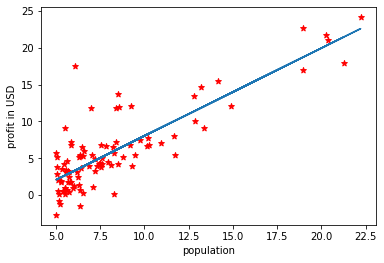

In [21]:
plotLinearFit(X,1,y,X_norm,Theta)
print(J.shape)

In [22]:
###Plotting cost function with number of iterations
def plotCost(J):
    plt.plot(J)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost(J)")
    plt.title("Cost function")

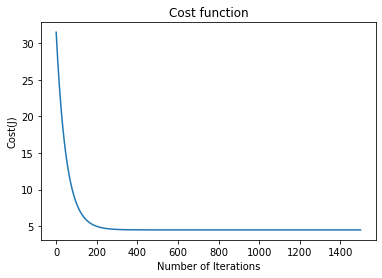

In [23]:
plotCost(J)

In [24]:
######Implemeting Linear Regression for Multiple features.
my_data_mul = np.loadtxt('data/ex1data2.txt',delimiter=',')

In [25]:
print(my_data_mul.shape)
print(type(my_data_mul))

(47, 3)
<class 'numpy.ndarray'>


In [26]:
####Adding interceptor term X0
my_data_mulFinal = np.concatenate((np.ones((my_data_mul.shape[0],1)),my_data_mul),axis=1)
print(my_data_mulFinal.shape)

(47, 4)


In [27]:
X = my_data_mulFinal[:,:-1]
y = my_data_mulFinal[:,-1].reshape((X.shape[0],1))

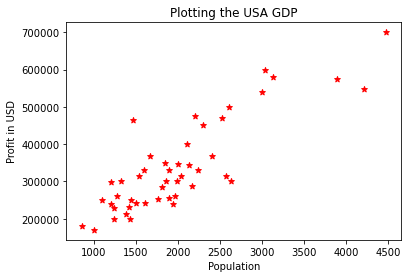

In [28]:
plotScatter(X,1,y)

In [29]:
Xmean,Xstd,X_norm = Standard_Normalization(X)
print(Xmean)
print(Xstd)
print(X_norm.shape)

[[   0.         2000.68085106    3.17021277]]
[[1.00000000e+00 7.86202619e+02 7.52842809e-01]]
(47, 3)


In [30]:
Theta = np.zeros((X.shape[1],1))
J,Theta = GradientDescent(X_norm,y,Theta,alpha=0.01,iterations=1500)

In [31]:
print(Theta)

[[340412.56301439]
 [109370.05670466]
 [ -6500.61509507]]


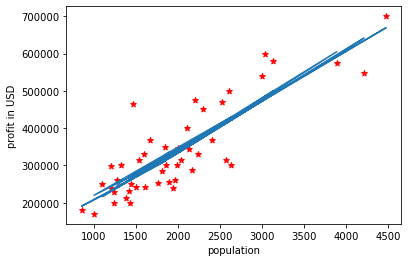

In [32]:
###Plottng fitline
plotLinearFit(X,1,y,X_norm,Theta)

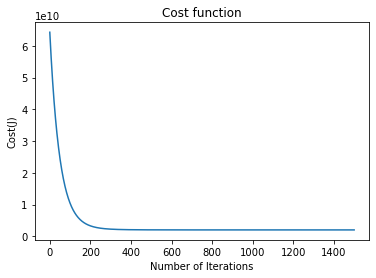

In [33]:
##Plotting cost function
plotCost(J)

In [34]:
###Predicting the new value
x_test = np.array([[1,1650,3]])
x_test_norm = (x_test-Xmean)/Xstd
predict = np.dot(x_test_norm,Theta)
print("predicted price "+str(predict))

predicted price [[293098.46667577]]


In [35]:
#####Implementing Normal Equations
####Here no Normalization of Features/Inputs
####Single formula (X.T*X)-1*(X.T*y)
#####(dxn*nxd)*(dxn*nx1)=(dx1)
A = np.linalg.pinv(np.dot(X.T,X))
B = np.dot(X.T,y)
Theta_N = np.dot(A,B)

In [36]:
print(Theta_N)

[[89597.90954361]
 [  139.21067402]
 [-8738.01911255]]


In [37]:
predictN = np.dot(x_test,Theta_N)
print(predictN)

[[293081.46433499]]


# Implemeting Linear Regression with SKlearn Libraries

In [38]:
###Importing Libraries from Scikit 
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(X_norm,y)

LinearRegression()

In [41]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [42]:
lr.coef_

array([[     0.        , 109447.79646964,  -6578.35485416]])

In [43]:
pred = lr.predict(x_test_norm)

In [44]:
pred

array([[293081.4643349]])

In [45]:
lr.rank_

2